# Introduction

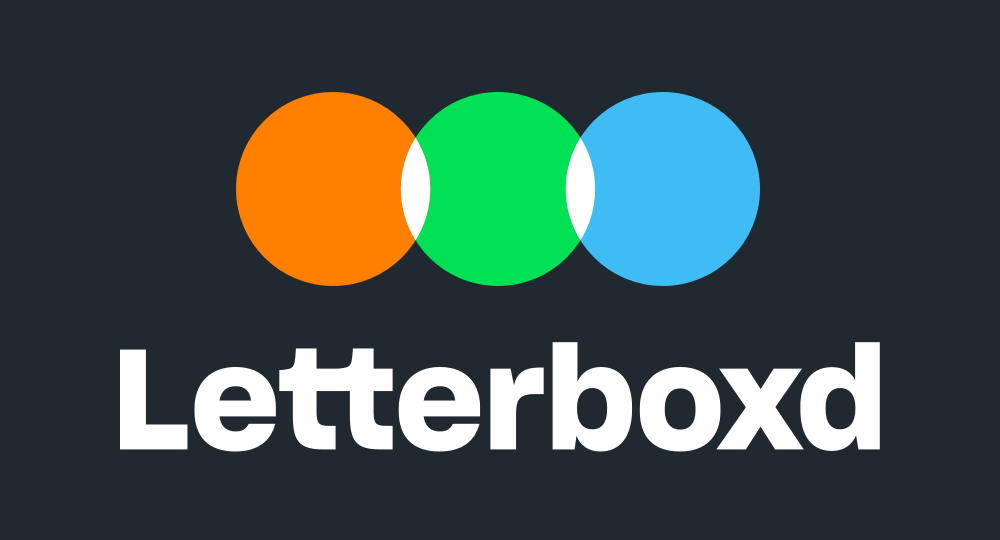

Given the popularity of the **Letterboxd Top 250 Filipino Feature-Length Films** as a de-facto guide to Filipino movies on the website, it's imperative to do a deep dive into the list's data and identifying more pertinent conclusions that might interest the data-curious movie-going audience. 

*With the help of Arno Lafontaine's GitHub repository, I've extracted and scraped the list to further analyze it with the goal of finding out frequent occurrences and other interesting facts that can be found from the local Top 250 of the Philippines.*

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast
from datetime import datetime

# MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer

# Uploading 
df = pd.read_csv('top-250-narrative-feature-length-filipino.csv', parse_dates=['Release_year'])
df['Release_year'] = df["Release_year"].dt.year

for col in df[['Producer', 'Writer', 'Editor', 'Cinematography', 
               'Production Design', 'Composer', 'Sound', 'Genre', 'Cast']]:
    df[col] = df[col].fillna('[None]').apply(ast.literal_eval)

df

,Film_title,Release_year,Runtime,Director,Producer,Writer,Editor,Cinematography,Production Design,Composer,Sound,Genre,Cast,Personal_rating,Average_rating,Letterboxd URL
0,Barber's Tales,2013,120.0,Jun Robles Lana,"[Ferdinand Lapuz, Antonio Tuviera]",[Jun Robles Lana],[Lawrence S. Ang],[Carlo Mendoza],[Chito Sumera],[Ryan Cayabyab],"[Mark Locsin, Warren Santiago]",[drama],"[Eugene Domingo, Eddie Garcia, Iza Calzado, Gl...",NaN,4.50,https://letterboxd.com//film/barbers-tales/
1,Moral,1982,138.0,Marilou Diaz-Abaya,[None],[Ricardo Lee],"[Manolo R. Abaya, Marc Tarnate]",[Manolo R. Abaya],[Fiel Zabat],[George Canseco],[Rolly Ruta],[drama],"[Lorna Tolentino, Gina Alajar, Sandy Andolong,...",NaN,4.42,https://letterboxd.com//film/moral/
2,Himala,1982,124.0,Ishmael Bernal,[Bibsy N. Carballo],[Ricardo Lee],[Ike Jarlego Jr.],[Sergio Lobo],[Raquel Villavicencio],[Winston Raval],[Vic Macamay],[drama],"[Nora Aunor, Spanky Manikan, Vangie Labalan, G...",NaN,4.27,https://letterboxd.com//film/himala/
3,This Is My Country,1984,105.0,Lino Brocka,[None],[Jose F. Lacaba],[George Jarlego],[Conrado Baltazar],[Joey Luna],[Jess Santiago],"[Rudy Baldovino, Willy Islao]","[action, drama, crime]","[Phillip Salvador, Gina Alajar, Venchito Galve...",NaN,4.23,https://letterboxd.com//film/this-is-my-country/
4,Manila in the Claws of Light,1975,127.0,Lino Brocka,"[Mike de Leon, Severino Manotok Jr.]",[Clodualdo del Mundo Jr.],"[Ike Jarlego Jr., Edgardo Jarlego]","[Mike de Leon, Clodualdo del Mundo Jr.]",[None],[Max Jocson],"[Ramon Reyes, Luis S. Reyes]","[drama, mystery]","[Bembol Roco, Lou Salvador Jr., Tommy Abuel, L...",NaN,4.19,https://letterboxd.com//film/manila-in-the-cla...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Tuhog,2013,105.0,Veronica Velasco,[None],"[Veronica Velasco, Jinky Laurel]",[Beng Bandong],[Kerwin Go],[Erik Manalo],[Vincent de Jesus],[Arnel Labayo],"[drama, comedy]","[Eugene Domingo, Enchong Dee, Leo Martinez, Ja...",NaN,3.40,https://letterboxd.com//film/tuhog/
246,Sleepless,2015,120.0,Prime Cruz,[None],"[Prime Cruz, Jen Chuaunsu]",[Galileo Te],[Tey Clamor],[Nestor Abrogena Jr.],[BP Valenzuela],[Denise Santos],"[romance, comedy]","[Glaiza de Castro, Dominic Roco, TJ Trinidad, ...",NaN,3.40,https://letterboxd.com//film/sleepless-2015/
247,What Isn't There,2012,121.0,Marie Jamora,"[Marie Jamora, Daphne Chiu, Trinka Lat, Bernar...","[Marie Jamora, Ramon De Veyra]","[Marie Jamora, Edsel Abesames]",[Leung Ming-kai],[None],[None],[Ditoy Aguila],"[romance, drama]","[Dominic Roco, Annicka Dolonius, Dawn Zulueta,...",NaN,3.40,https://letterboxd.com//film/what-isnt-there/
248,RPG Metanoia,2010,103.0,Luis C. Suarez,[None],"[Tey Clamor, Jade Castro, Luis C. Suarez]","[Joey Conejos, Joana R. Vasquez]",[None],[William Moraga],[None],[None],"[animation, fantasy, drama, adventure]","[Aga Muhlach, Vhong Navarro, Eugene Domingo, Z...",NaN,3.40,https://letterboxd.com//film/rpg-metanoia/


# Data Cleaning

- How to turn the cast column into a large matrix which represents one actor per column? (**ANSWER:** *Use the fit_transform method of the MultiLabelBinarizer function!*)

In [46]:
df.dtypes
# Film_title          object
# Release_year         int64
# Director            object
# Cast                object
# Personal_rating    float64
# Average_rating     float64
# Letterboxd URL      object
# dtype: object

# Add column which denotes placement of movie
df["movie_ranking"] = df.index + 1

# Convert each element from a string into a list
# Obtained values are lists as string datatype
mlb = MultiLabelBinarizer()
names_matrix = mlb.fit_transform(df["Cast"])
names_df = pd.DataFrame(names_matrix, columns=list(mlb.classes_))

df = pd.concat([df, names_df], axis=1)
df

,Film_title,Release_year,Runtime,Director,Producer,Writer,Editor,Cinematography,Production Design,Composer,...,Zar Donato,Zarah Pagay,Zelda Rosset Colon,Zenaida Amador,Zephrine Dane Cura,Zeus Bascon,Zeus Bañas,Zorayda Sanchez,Zoren Legaspi,Zsa Zsa Padilla
0,Barber's Tales,2013,120.0,Jun Robles Lana,"[Ferdinand Lapuz, Antonio Tuviera]",[Jun Robles Lana],[Lawrence S. Ang],[Carlo Mendoza],[Chito Sumera],[Ryan Cayabyab],...,0,0,0,0,0,0,0,0,0,0
1,Moral,1982,138.0,Marilou Diaz-Abaya,[None],[Ricardo Lee],"[Manolo R. Abaya, Marc Tarnate]",[Manolo R. Abaya],[Fiel Zabat],[George Canseco],...,0,0,0,0,0,0,0,0,0,0
2,Himala,1982,124.0,Ishmael Bernal,[Bibsy N. Carballo],[Ricardo Lee],[Ike Jarlego Jr.],[Sergio Lobo],[Raquel Villavicencio],[Winston Raval],...,0,0,0,0,0,0,0,0,0,0
3,This Is My Country,1984,105.0,Lino Brocka,[None],[Jose F. Lacaba],[George Jarlego],[Conrado Baltazar],[Joey Luna],[Jess Santiago],...,0,0,0,0,0,0,0,0,0,0
4,Manila in the Claws of Light,1975,127.0,Lino Brocka,"[Mike de Leon, Severino Manotok Jr.]",[Clodualdo del Mundo Jr.],"[Ike Jarlego Jr., Edgardo Jarlego]","[Mike de Leon, Clodualdo del Mundo Jr.]",[None],[Max Jocson],...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Tuhog,2013,105.0,Veronica Velasco,[None],"[Veronica Velasco, Jinky Laurel]",[Beng Bandong],[Kerwin Go],[Erik Manalo],[Vincent de Jesus],...,0,0,0,0,0,0,0,0,0,0
246,Sleepless,2015,120.0,Prime Cruz,[None],"[Prime Cruz, Jen Chuaunsu]",[Galileo Te],[Tey Clamor],[Nestor Abrogena Jr.],[BP Valenzuela],...,0,0,0,0,0,0,0,0,0,0
247,What Isn't There,2012,121.0,Marie Jamora,"[Marie Jamora, Daphne Chiu, Trinka Lat, Bernar...","[Marie Jamora, Ramon De Veyra]","[Marie Jamora, Edsel Abesames]",[Leung Ming-kai],[None],[None],...,0,0,0,0,0,0,0,0,0,0
248,RPG Metanoia,2010,103.0,Luis C. Suarez,[None],"[Tey Clamor, Jade Castro, Luis C. Suarez]","[Joey Conejos, Joana R. Vasquez]",[None],[William Moraga],[None],...,0,0,0,0,0,0,0,0,0,0


After cleaning the data and converting an iterable column of iterables into their matrix equivalent, it is time to further analyze the list!

# Exploratory Data Analysis

*Some important questions that can be identified from this list*:
- Which directors frequently appear on the list?
- What are the average ratings of directors, with a minimum of three movies, on the list?
- Which cast members appear often in the Top 250? Which cast members, with a minimum of x movies, have the highest ratings?

### Coming Soon:
- Which producers appear frequently? Rating average? 
- Cameramen? Composer? Writers? Sound? Production Design? Editors?
- Screen Runtime? By decade?
- Additional minor improvements on generated graphs

(This information can only be obtained by improving the webscraper program to include such metadata)

## Average per Decade
*What is the average rating of each of these movies from each decade?*

,Decade,Average_rating,movie_count
0,1950,3.642000,5
1,1960,3.640000,2
2,1970,3.837368,19
3,1980,3.872963,27
4,1990,3.550400,25
5,2000,3.724146,41
6,2010,3.686348,115
7,2020,3.633750,16


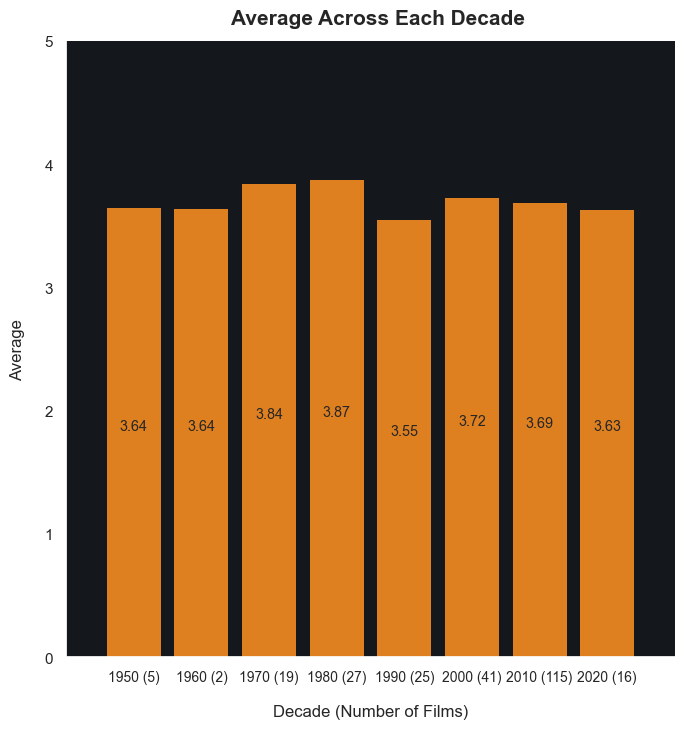

In [47]:
# Measures of Central Tendency
mean_rating = df["Average_rating"].mean()
med_rating = df["Average_rating"].median()
mode_rating = df["Average_rating"].mode()

# Average per Decade
# convert year string to integer
df['Release_year'] = df['Release_year'].astype(int)

# define function to calculate decade
def get_decade(year):
    return str(year - year%10)

# apply the get_decade function to the 'Date' column and create a new column 'Decade'
df['Decade'] = df['Release_year'].apply(lambda x: get_decade(x))

# Groupby Decade and get the mean of the average rating
decade_average = pd.DataFrame(df.groupby("Decade").agg({'Average_rating':"mean", "Film_title":"count"}).reset_index())[['Decade', 'Average_rating', "Film_title"]]
decade_average["Decade"].astype("category")
decade_average.columns = ["Decade", "Average_rating", "movie_count"]

# Generate a bar chart
sns.set_style("dark", rc={'axes.facecolor': '#14171C'})
g = sns.catplot(data=decade_average, x='Decade', y="Average_rating", kind="bar", 
                color="#ff8000", height=7, aspect=1, edgecolor='none')
g.fig.suptitle("Average Across Each Decade", x=0.55, y = 1.02, size=15, fontweight="bold")
g.set(ylabel="Average Rating", ylim=(0,5), xlim=(-1, len(decade_average)))

# add annotations to bars
for i, v in enumerate(list(decade_average["Average_rating"])):
    plt.annotate(str(round(v, 2)), xy=(i, v/2), ha='center', va='bottom', fontsize=10.4)

#g.set_xticklabels([1,2,3,4,5,6,7,8])
# g.set_xticklabels(f"{row["Decade"]} ({row["movie_count"]})" for index, row in decade_average[['Decade', "movie_count"]].iterrows())
g.set_xticklabels((F"{row['Decade']} ({row['movie_count']})" for index, row in decade_average[['Decade', "movie_count"]].iterrows()))
g.set_xticklabels(g.ax.get_xticklabels(), fontsize=10)
g.ax.set_xlabel("Decade (Number of Films)", labelpad=14)
g.ax.set_ylabel("Average", labelpad=14)
decade_average

### Observations
- The 1990s are the lowest rated decade with 3.55 while the 80s are the highest rated with 3.87
- The decade with the most films is the 2010s, with 115. 

## Average Rating of Directors
*This analysis will only apply to directors who appear at least three times on the list.*

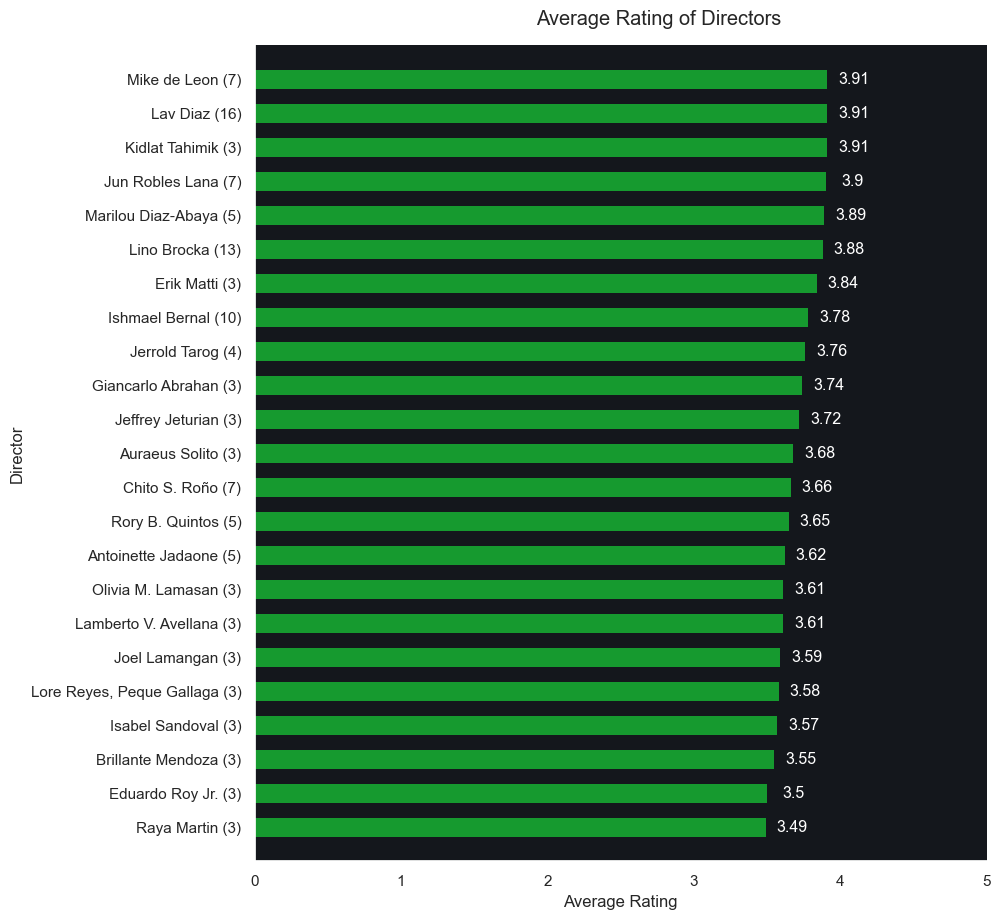

In [48]:
# Directors that appear frequently on the list
director_freq = pd.DataFrame(df["Director"].value_counts())
director_freq.columns = ["Frequency"]
director_freq = director_freq[director_freq["Frequency"] >= 3]
director_freq

# For directors who appear more than three times, what is the average rating?
## We don't take directors who only appear twice since the
## data for them is too small for measuring the average.
director_avg_all = df.groupby('Director').agg({"Average_rating":"mean", "Film_title": "count"}).sort_values(by="Average_rating",ascending=False)
director_avg_reg = director_avg_all[director_avg_all.index.isin(director_freq.index)]
director_avg_reg = director_avg_reg.reset_index()
director_avg_reg.columns = ["Director", "Average_rating", "Frequency"]
director_avg_reg["Average_rating"] = director_avg_reg["Average_rating"].round(2)

# Catplot
sns.set(style="dark", rc={'axes.facecolor': '#14171C'})
g2 = sns.catplot(data=director_avg_reg, kind="bar", y="Director", x="Average_rating", 
                 height=9, aspect=1.1, color='#00B021', width=0.55, edgecolor='none')
g2.fig.suptitle("Average Rating of Directors", y=1.02, x=0.65)
g2.set(xlabel="Average Rating", ylim=((len(director_avg_reg)), -1), xlim=(0, 5))
g2.set_yticklabels([F"{row['Director']} ({row['Frequency']})" for index, row in director_avg_reg.iterrows()])

# add annotations to bars
for i, v in enumerate(list(director_avg_reg["Average_rating"])):
    plt.annotate(str(round(v, 2)), xy=(v+0.18, i), ha='center', va='center', fontsize=11.5, color='white')

(Developer's note: *This graph doesn't separate Lore Reyes and Peque Gallaga's contributions.*)

### Observations
- Among the directors with the least most frequent (3) films on the Top 250 list, Kidlat Tahimik is the highest-rated director at 3.9.
- Despite having 9 more films in the list, Mike de Leon and Lav Diaz share the same average rating of movies at 3.91.
- Majority of the directors with at most 3 films on the list occupy the bottom half. The lowest ranking director with more than 3 films on this list is Antoinette Jadaone.

## Cast Analysis

Preliminary work
- Subset the dataframe to obtain only the film title, the average rating of each film, and the column of actors
- Transpose the table such that the index is the list of cast members
- Create a new column labeled "Appearances" which is the total number of appearances each actor/actress makes in the Top 250

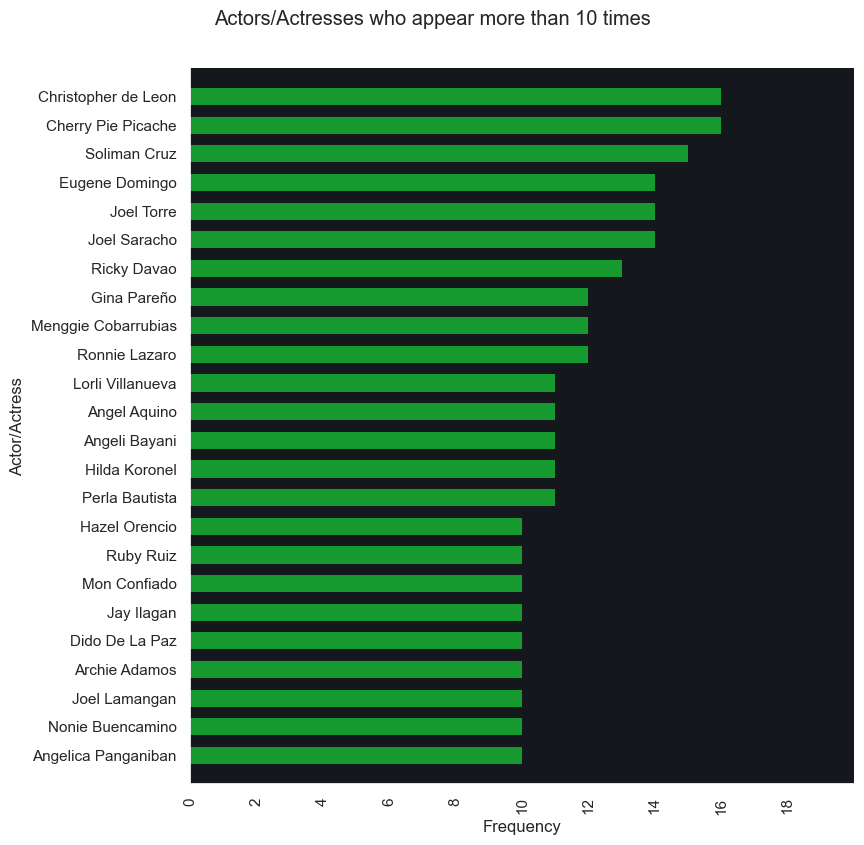

In [49]:
# 2555 columns represent cast members

# Subsetting the Actors Dataset
df_actors = df.iloc[:, 0:2562]
df_actors = df_actors.drop(['Release_year', 'Director', 'Cast', 'Personal_rating', 'Letterboxd URL',
                           'Average_rating', 'movie_ranking', 'Runtime'], axis = 1)
df_actors = df_actors.set_index('Film_title')
df_actors = df_actors.T
df_actors["Frequency"] = df.iloc[2:, 0:].sum(axis=0, numeric_only=True)
df_actors = df_actors[df_actors["Frequency"] > 3]
#df_actors

# Frequency table containing actors/actresses who appear in more than 3 movies
df_act_freq = pd.DataFrame(df_actors["Frequency"].value_counts())

# Locating an actor/actress and the movies which they appear in
row = df_actors.loc['Vic Silayan']
df_actors.loc['Vic Silayan', row >= 1]

# Sorting the df_actors table according to highest frequency
df_actors_sorted = df_actors.sort_values(by="Frequency", ascending=False)
x = pd.DataFrame(df_actors_sorted[df_actors_sorted["Frequency"] >= 10]["Frequency"].reset_index())
#sns.displot(data=x)
x.columns = ["Actor/Actress", "Frequency"]

g3 = sns.catplot(data=x, kind="bar", y="Actor/Actress", x="Frequency", edgecolor='none',
                height=8, aspect=1.1, color='#00B021', width = 0.60)
g3.set_xticklabels(rotation=90)
g3.fig.suptitle("Actors/Actresses who appear more than 10 times", y=1.05)
g3.set(ylim=((len(x)), -1), xlim=(0, 20))


# g2 = sns.catplot(data=director_avg_reg, kind="bar", y="Director", x="Average_rating", 
#                  height=9, aspect=1.1, color='#00B021', width=0.55, edgecolor='none')
# g2.fig.suptitle("Average Rating of Directors", y=1.02, x=0.65)
# g2.set(xlabel="Average Rating", ylim=((len(director_avg_reg)), -1), xlim=(0, 5))
# g2.set_yticklabels([F"{row['Director']} ({row['Frequency']})" for index, row in director_avg_reg.iterrows()])


#df_actors_sorted[df_actors_sorted["Frequency"] >= 10].index
# Histogram
#g3 = sns.displot(data=df_act_freq, x=df_act_freq.index, y="Frequency")

## Runtime Analysis

*Time to generate graphs which visually display the relationship of runtime to average rating!*
(And maybe, include some additional categorization based on directors and the decades in which these runtimes take place!)

In [50]:
# Subset the main dataframe into `runtime_df`.
runtime_df = df[["Film_title", 'Release_year', 'Director', 'Decade', 'Average_rating', 'Runtime']]
runtime_df

,Film_title,Release_year,Director,Decade,Average_rating,Runtime
0,Barber's Tales,2013,Jun Robles Lana,2010,4.50,120.0
1,Moral,1982,Marilou Diaz-Abaya,1980,4.42,138.0
2,Himala,1982,Ishmael Bernal,1980,4.27,124.0
3,This Is My Country,1984,Lino Brocka,1980,4.23,105.0
4,Manila in the Claws of Light,1975,Lino Brocka,1970,4.19,127.0
...,...,...,...,...,...,...
245,Tuhog,2013,Veronica Velasco,2010,3.40,105.0
246,Sleepless,2015,Prime Cruz,2010,3.40,120.0
247,What Isn't There,2012,Marie Jamora,2010,3.40,121.0
248,RPG Metanoia,2010,Luis C. Suarez,2010,3.40,103.0


In [51]:
# Sort by longest to shortest film
runtime_df.sort_values(by='Runtime', ascending=False)

,Film_title,Release_year,Director,Decade,Average_rating,Runtime
6,Evolution of a Filipino Family,2004,Lav Diaz,2000,4.17,647.0
23,Death in the Land of Encantos,2007,Lav Diaz,2000,4.05,540.0
56,Heremias: Book One - The Legend of the Lizard ...,2006,Lav Diaz,2000,3.88,519.0
52,A Lullaby to the Sorrowful Mystery,2016,Lav Diaz,2010,3.91,485.0
31,Melancholia,2008,Lav Diaz,2000,3.99,450.0
...,...,...,...,...,...,...
172,The Baseball Player,2022,Carlo Obispo,2020,3.54,71.0
32,The Woman in the Septic Tank 3: The Real Untol...,2019,Marlon Rivera,2010,3.99,NaN
147,Ploning,2008,Dante Nico Garcia,2000,3.63,NaN
216,Ang TV Movie: The Adarna Adventure,1996,Johnny Manahan,1990,3.45,NaN


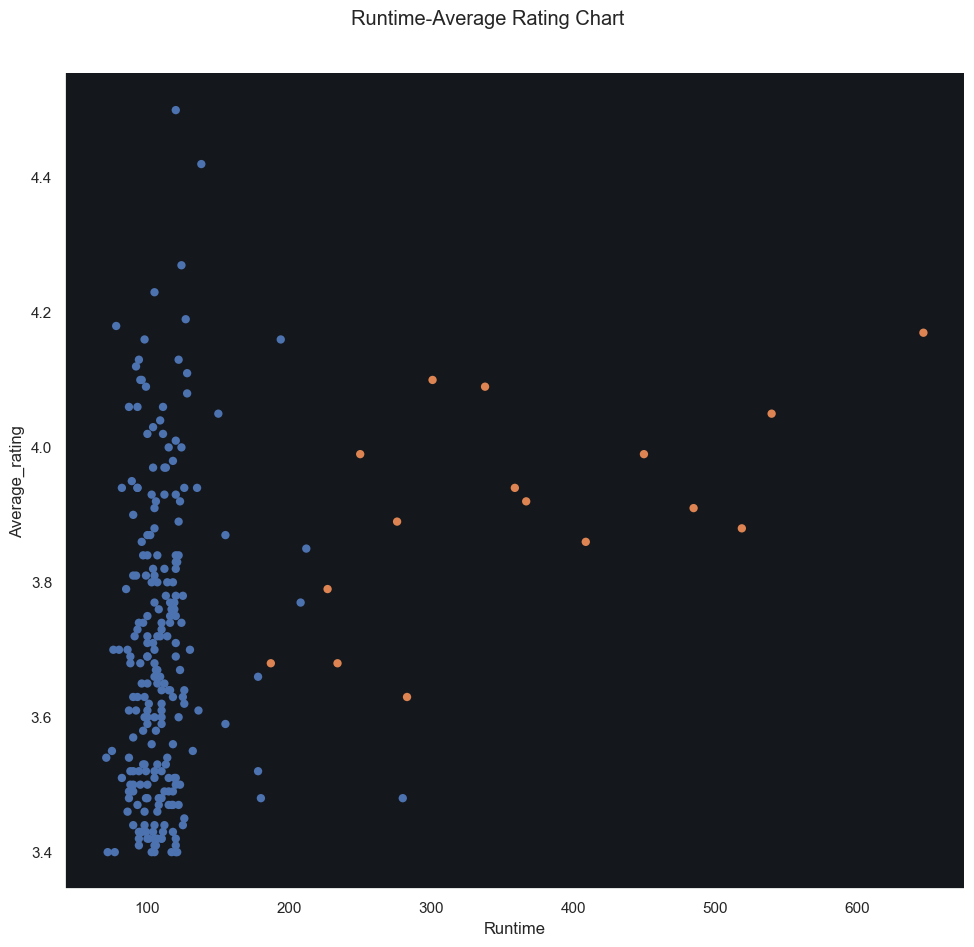

In [64]:
# Drop NaN rows
runtime_df = runtime_df.dropna(subset=['Runtime'])
runtime_df["lav_color"] = np.where(runtime_df['Director'] == 'Lav Diaz', '#ff8000', '#00B021')

g4 = sns.relplot(data=runtime_df, x='Runtime', y='Average_rating', edgecolor='none', hue='lav_color', legend=False,
            height=9, aspect=1.1)
g4.fig.suptitle("Runtime-Average Rating Chart", y=1.05)
plt.show()

In [68]:
# Drop all entries with Lav Diaz in it
runtime_df_no_lav = runtime_df[runtime_df['Director'] != 'Lav Diaz']
runtime_df_no_lav = runtime_df_no_lav.drop(['lav_color'], axis=1)
runtime_df_no_lav

,Film_title,Release_year,Director,Decade,Average_rating,Runtime
0,Barber's Tales,2013,Jun Robles Lana,2010,4.50,120.0
1,Moral,1982,Marilou Diaz-Abaya,1980,4.42,138.0
2,Himala,1982,Ishmael Bernal,1980,4.27,124.0
3,This Is My Country,1984,Lino Brocka,1980,4.23,105.0
4,Manila in the Claws of Light,1975,Lino Brocka,1970,4.19,127.0
...,...,...,...,...,...,...
245,Tuhog,2013,Veronica Velasco,2010,3.40,105.0
246,Sleepless,2015,Prime Cruz,2010,3.40,120.0
247,What Isn't There,2012,Marie Jamora,2010,3.40,121.0
248,RPG Metanoia,2010,Luis C. Suarez,2010,3.40,103.0


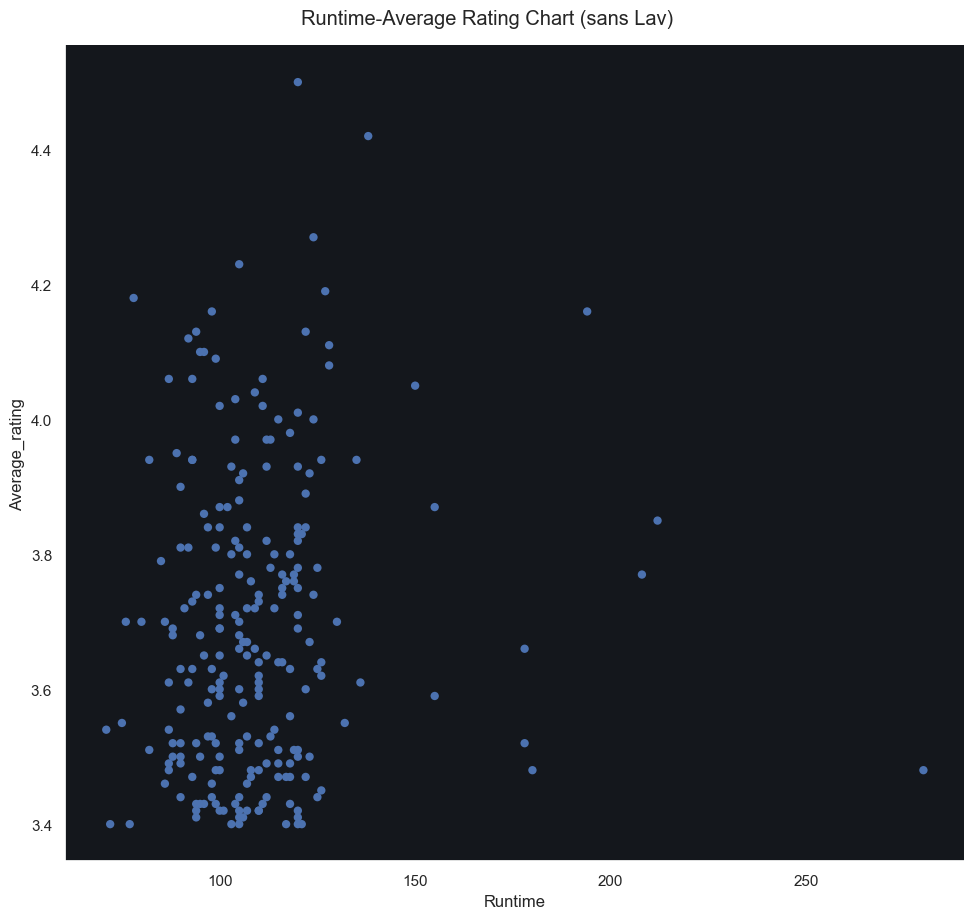

In [93]:
g5 = sns.relplot(data=runtime_df_no_lav, x='Runtime', y='Average_rating', 
                edgecolor='none', legend=False,
            height=9, aspect=1.1)
g5.fig.suptitle("Runtime-Average Rating Chart (sans Lav)", y=1.02)
plt.show()

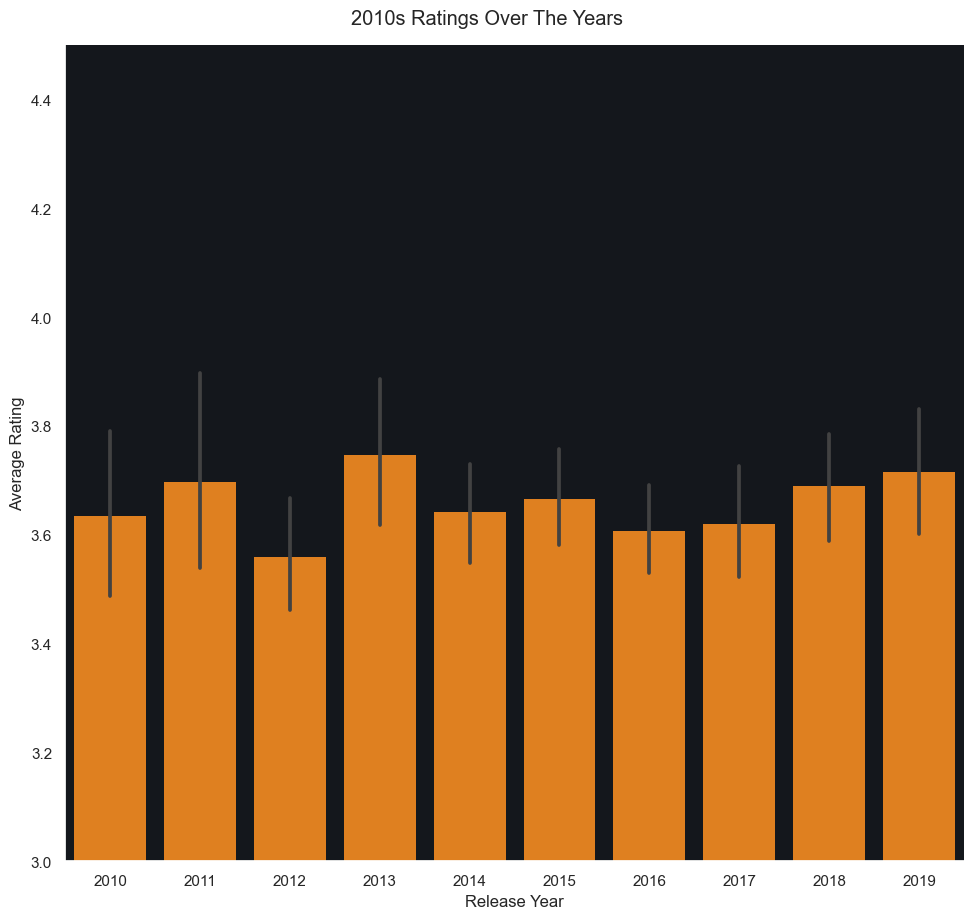

In [92]:
runtime_df_no_lav['Decade'] = runtime_df_no_lav['Decade'].astype('category')
g6 = sns.catplot(data=runtime_df_no_lav[runtime_df_no_lav['Decade'] == '2010'], x='Release_year', y='Average_rating', 
                edgecolor='none', color='#ff8000', legend=False, kind='bar', height=9, aspect=1.1)
g6.fig.suptitle("2010s Ratings Over The Years", y=1.02)
g6.set(ylim=(3,4.5), xlabel="Release Year", ylabel="Average Rating")
plt.show()